<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span><ul class="toc-item"><li><span><a href="#polyModelWithNoise" data-toc-modified-id="polyModelWithNoise-1.1">polyModelWithNoise</a></span></li><li><span><a href="#polyGradient" data-toc-modified-id="polyGradient-1.2">polyGradient</a></span></li><li><span><a href="#Stochastic-gradient-descent-algorithm" data-toc-modified-id="Stochastic-gradient-descent-algorithm-1.3">Stochastic gradient descent algorithm</a></span></li><li><span><a href="#Third-order-polynomial" data-toc-modified-id="Third-order-polynomial-1.4">Third order polynomial</a></span></li><li><span><a href="#Plotting-$\chi^2$" data-toc-modified-id="Plotting-$\chi^2$-1.5">Plotting $\chi^2$</a></span></li><li><span><a href="#Comparison-within-model-training-range" data-toc-modified-id="Comparison-within-model-training-range-1.6">Comparison within model training range</a></span></li><li><span><a href="#Comparison-outside-of-model-training-range" data-toc-modified-id="Comparison-outside-of-model-training-range-1.7">Comparison outside of model training range</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.7.1">Conclusion</a></span></li></ul></li></ul></li></ul></div>

# Module 1 Exercises: Curve Fitting

Author: SL

Last Edited: 13.10.2021

Link to this notebook on GitHub: https://github.com/SL023/MLforPhys/blob/main/Week1_IntroToNeuralNets.ipynb

## Introduction 

This notebook implements the stochastic gradient descent algorithm using pure python, with the only dependency being the numpy library. 

We begin by importing the numpy library, as well as matplotlib for plotting our data and functions, and alter the default styles of these plots. 

In [1]:
# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

# altering style of plots
import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = [10.0, 6.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

### polyModelWithNoise


We create a function defined as <code>polyModelWithNoise(x,theta,sigma)</code> where:
- `x` is a numpy array of x values
- `theta` are the parameters of the polynomial such that $y(x) = \sum_i \theta_i x^i = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 \dots \theta_n x^n$
- `sigma` is the standard deviation of the noise distribution that is added to the polynomial function


For this function, we use the `polyval` built-in function from numpy to define the polynomial, noting that the order of the theta values need to be reversed, as per the requirements of the parameters of this function. 

The added noise is done so using by choosing random values from a normal distribution with the specified standard deviation. [1]

In [2]:
def polyModelWithNoise(x,theta,sigma):
    '''
    Function to plot a polynomial with noise
    Inputs:
        x: numpy array of x values
        theta: numpy array of parameters of the polynomial in ascending order of x
        sigma: standard deviation for added noise from a normal/gaussian distribution 
    Outputs:
        y + noise: numpy array of function values corresponding to each x value in input numpy array 
    '''
    # polynomial with provided coefficients theta
    y = np.polyval(np.flip(theta), x) 
    # noise from normal distribution 
    noise = np.random.normal(0, sigma, y.shape) 
    return y + noise

We now use this function to plot a sample of 100 points linearly arranged between 0 and 1, with theta parameters of [0,1] and a noise sigma of 0.5 

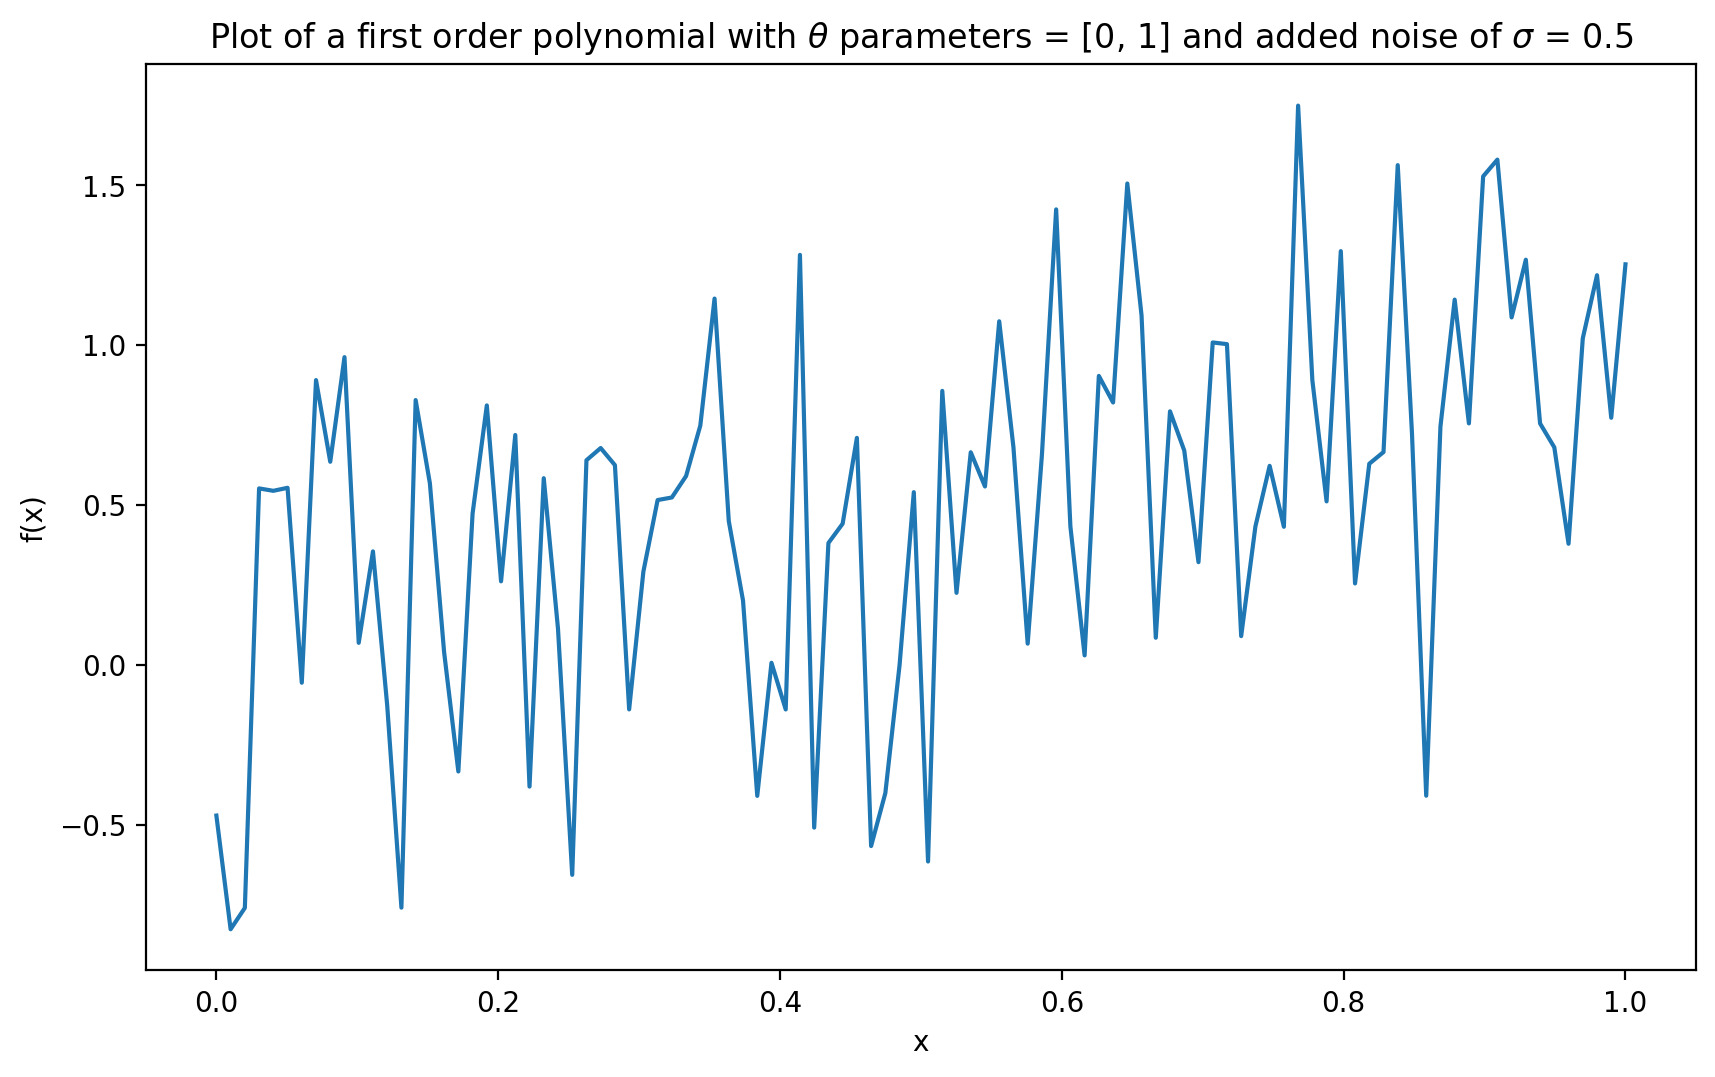

In [3]:
# sample of 100 points linearly arranged between 0 and 1
x = np.linspace(0, 1, 100)

# parameters
theta = np.array([0, 1])
sigma = 0.5

# plot first-order polynomial
fig, ax = plt.subplots()
ax.plot(x, polyModelWithNoise(x, theta, sigma))

# set axis and title labels
ax.set_title(r"Plot of a first order polynomial with $\theta$ parameters = [0, 1] and added noise of $\sigma$ = 0.5")
ax.set_xlabel("x")
ax.set_ylabel("f(x)");

### polyGradient

To implement the stochastic gradient descent algorithm, we also require a function that returns the gradient of the polynomial function with respect to the parameters $\theta$. Such a function named <code>polyGradient(x,theta)</code> has been defined below: 

**Mathematical Explanation of the polyGradient function**

The polynomial with no noise is:

$$y(x) = \sum_i \theta_i x^i = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 \dots \theta_n x^n$$

We add a random value of noise from the normal distribution, so our "noisy" polynomial function becomes:

$$f(x) = y(x) + \text{noise}$$

Thus, the gradient of the polynomial function with respect to the parameters $\theta$ is given by: 

$$\frac{\partial f(x)}{\partial \theta_i} = x^i$$ 

To implement this in the most efficient way possible, we use a broadcast-based approach that is ultimately based on matrix/array multiplication. [2] Effectively, this avoids use of any loops or multiple iterations.

In [4]:
def polyGradient(x, theta):
    '''
    Function to calculate the gradient of the polynomial function with respect to parameters theta
    Inputs: 
        x: numpy array of x values
        theta: numpy array of parameters of the polynomial in ascending order of x
    Output:
        grad_array: numpy array of gradient values with dimensions (len(theta), len(x))
    '''
    # calculates gradient of polynomial function using broadcast-based approach
    grad_array = x**np.arange(len(theta))[:,None] 
    return grad_array

### Stochastic gradient descent algorithm

Next, we implement a stochastic gradient descent algorithm to do the following:

Start with theta values of $\theta=[−1,0.5]$, and a learning rate of 0.5 then in a loop do the following 100 times

1. Generate a sample of 10 random x values between 0 and 1
2. Generate 10 y data values using your polyModelWithNoise function with the truth parameters $\theta=[0,1],\sigma=0.5$
3. Generate 10 y model values using the current theta values which started at $\theta=[−1,0.5]$, but no noise
4. Update the theta values using the gradient descent algorithm 

The final theta values after 100 iterations are: [0.04935441 1.02709358]


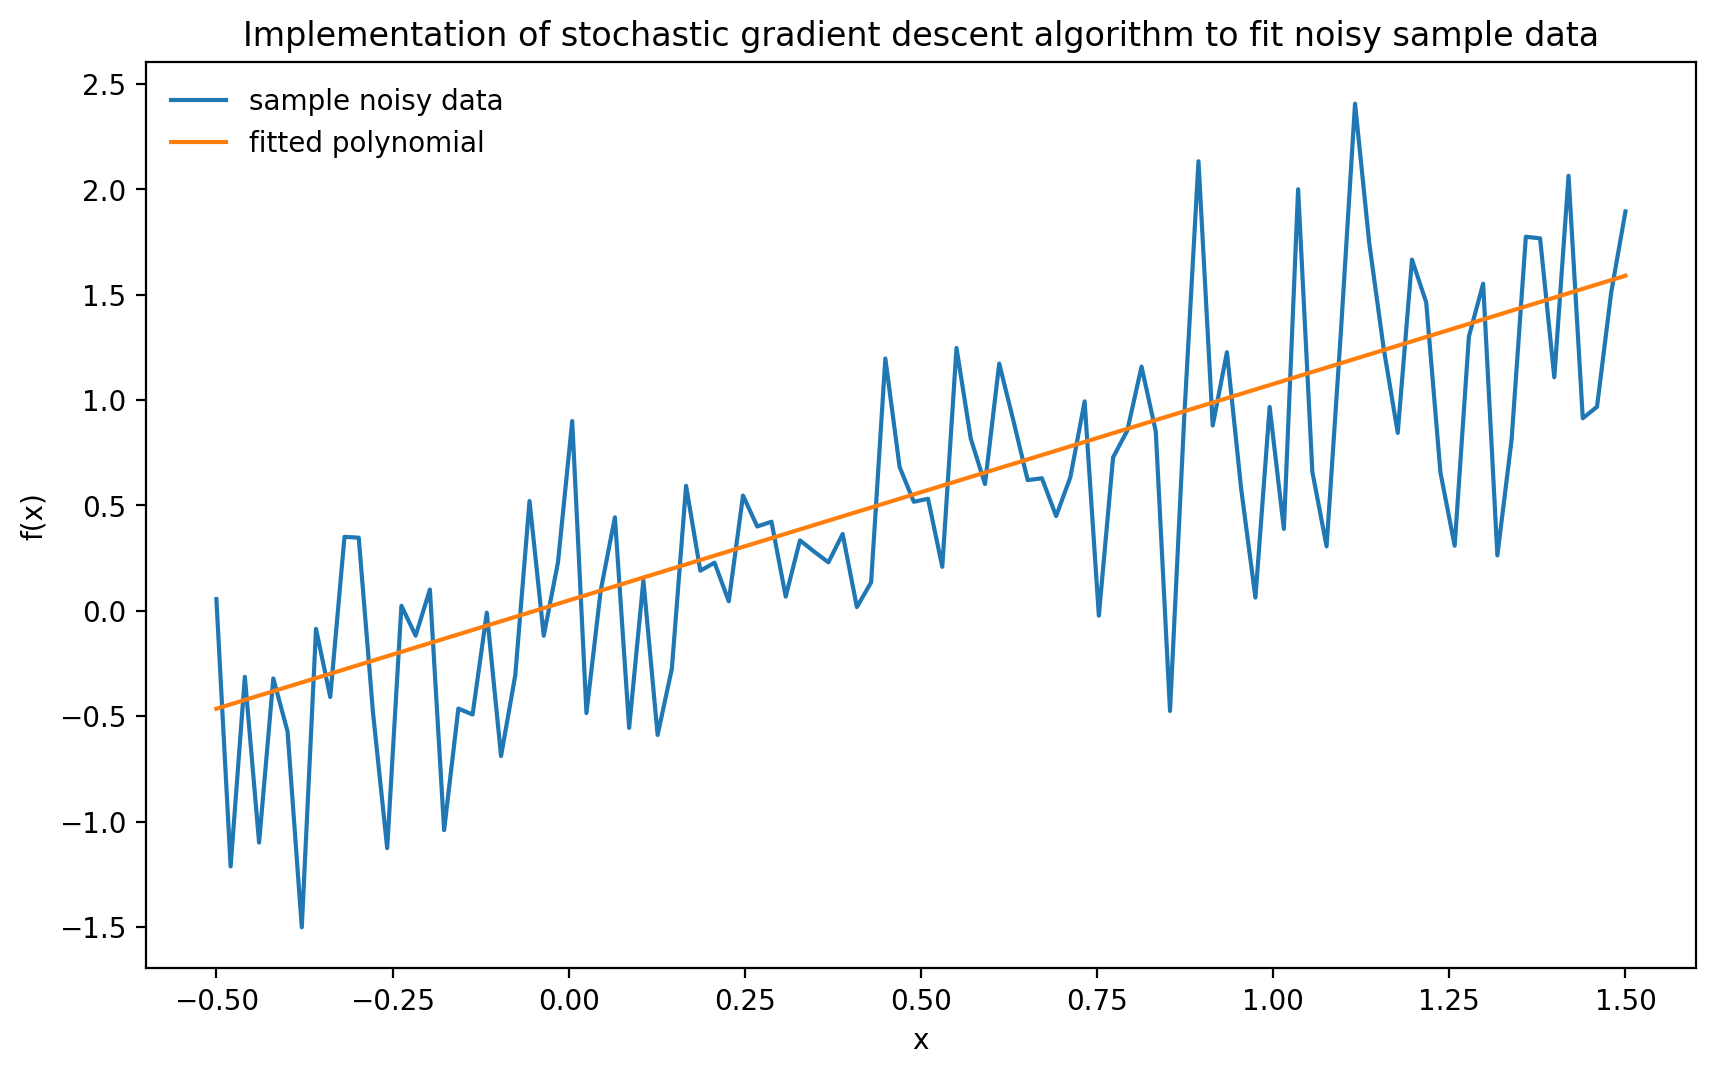

In [5]:
# true theta parameter
theta_true = np.array([0, 1])

# initial theta parameter 
theta = np.array([-1, 0.5])

eta = 0.5      # learning rate 
nsteps = 100   # number of iterations 

# implement loop to run 100 times
for n in range(nsteps):
    # generate 10 random x values from uniform distribution between 0 and 1
    x = np.random.uniform(0,1,10)
    # calculate data values with true paramters 
    data_values = polyModelWithNoise(x, theta_true, sigma=0.5)
    # calculate model values, initially with provided theta, which updates with each iteration
    model_values = polyModelWithNoise(x, theta, sigma=0)
    # calculate deviation between data and model values  
    deviation = model_values - data_values
    # use gradient descent algorithm to update theta values 
    theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)    
    
# output final values of theta 
print("The final theta values after {0} iterations are: {1}".format(nsteps, theta))

# plot a graph of true nosiy data against fitted first-order polynomial data 
fig,ax=plt.subplots()
# expanded range between -0.5 and 1.5
x_sweep=np.linspace(-0.5,1.5,100)
# plot sample 
ax.plot(x_sweep, polyModelWithNoise(x_sweep, np.array([0, 1]), sigma=0.5), label="sample noisy data")
ax.plot(x_sweep,polyModelWithNoise(x_sweep,theta, sigma=0), label="fitted polynomial")

# set titles and axis labels
ax.set_title("Implementation of stochastic gradient descent algorithm to fit noisy sample data")
ax.set_xlabel("x")
ax.set_ylabel("f(x)") 

# display legend
ax.legend()

plt.show()

### Third order polynomial

Now, we fit a third order polynomial with parameters $\theta = [0,1,2,2]$  and $\sigma = 0.5$ using a 1st order polynomial, 3rd order polynomial and 7th order polynomial using a stochastic gradient algorithm that samples 10 x and y data values between 0 and 1

In [6]:
def fitThirdPoly(order, nsteps):
    '''
    Implementing a stochastic gradient descent algorithm to fit a noisy third order polynomial
    Inputs:
        order: order of polynomial to fit 
        nstep: number of steps/iterations of the algorithm
    Outputs: 
        theta: final theta values after implementing algorithm 'nsteps' times
        chi2_out: numpy array of chi^2 values for each iteration (i.e. size of array = nsteps)
    
    '''
    # true theta parameter for third order polynomial
    theta_true = np.array([0, 1, 2, 2])
    # random initial theta values, number of values required is order of polynomial+1
    theta = np.array(np.random.uniform(-5, 5, size=order+1))
    # learning rate 
    eta = 0.5    
    # array of zeros to store chi^2 values for each iteration
    chi2_out = np.zeros(nsteps)   

    # iterate stochastic gradient algorithm with iterations = nsteps 
    for n in range(nsteps):
        # generate 10 random x values from uniform distribution between 0 and 1
        x = np.random.uniform(0,1,10)
        # calculate data values with true paramters 
        data_values = polyModelWithNoise(x, theta_true, sigma=0.5)
        # calculate model values, initially with provided theta, which updates with each iteration
        model_values = polyModelWithNoise(x, theta, sigma=0)
        # calculate deviation between data and model values  
        deviation = model_values - data_values
        # average chi^2 value is stored in n^th element of chi2_out array
        chi2_out[n]=np.average(deviation**2)     
        # use gradient descent algorithm to update theta values 
        theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1) 
        
    # output final theta value and array of chi^2 values 
    return theta, chi2_out 

We can use the `fitThirdPoly` function to plot the third order polynomial data over an expanded x-range of -0.5,1.5 (with linearly spaced x values), specifying the order of polynomial to fit and number of iterations using the parameters. 

Final theta values...
...for a first order polynomial fit after 100 iterations are: 
 [-0.88768619  4.83908519]
...for a third order polynomial fit after 100 iterations are: 
 [-0.6894406   3.4353579   0.29118586  1.27961539]
...for a seventh order polynomial fit after 100 iterations are: 
 [ 0.29733359  1.48548881 -0.57940821  2.27536671 -1.36263311  5.47829428
  1.02067254 -2.57710382]


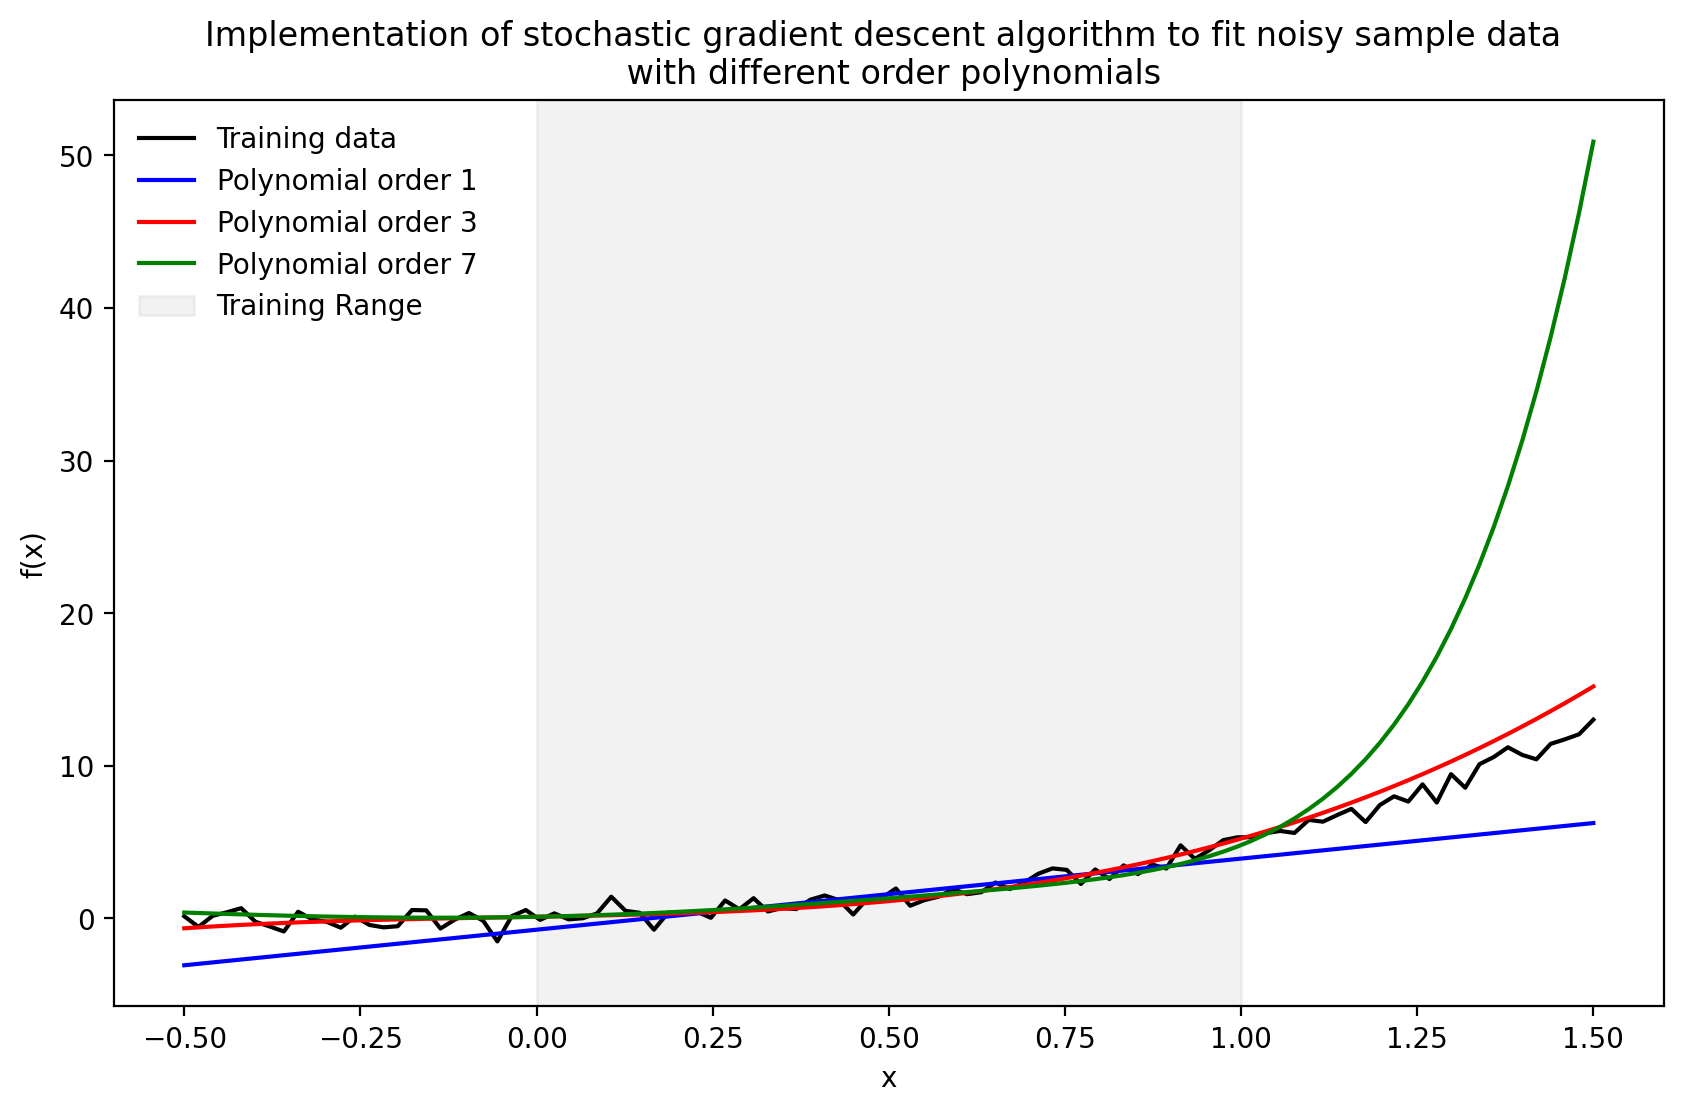

In [7]:
## create a new figure 
fig,ax=plt.subplots()
# specify array of expanded x values 
x_sweep=np.linspace(-0.5,1.5,100)
# define number of iterations 
nsteps = 100

# plot sample noisy data created using polyModelWithNoise function 
ax.plot(x_sweep, polyModelWithNoise(x_sweep, np.array([0, 1, 2, 2]), sigma=0.5),color="black", label="Training data")

# plot model polynomial using theta values obtained from fitThirdPoly function...

# ... for order 1
ax.plot(x_sweep,polyModelWithNoise(x_sweep, fitThirdPoly(1, nsteps)[0], sigma=0), color="blue", label="Polynomial order 1")
# ... for order 3
ax.plot(x_sweep,polyModelWithNoise(x_sweep, fitThirdPoly(3, nsteps)[0], sigma=0), color="red", label="Polynomial order 3")
# ... for order 7
ax.plot(x_sweep,polyModelWithNoise(x_sweep, fitThirdPoly(7, nsteps)[0], sigma=0), color="green", label="Polynomial order 7")

# highlight training and non-training regions 
ax.axvspan(0, 1, color='grey', alpha=0.1, label="Training Range")

# set titles and axis labels
ax.set_title("Implementation of stochastic gradient descent algorithm to fit noisy sample data \n with different order polynomials")
ax.set_xlabel("x")
ax.set_ylabel("f(x)") 

# display legend 
ax.legend();

# output final values of theta 
print("Final theta values...")
print("...for a first order polynomial fit after {0} iterations are: \n {1}".format(nsteps, fitThirdPoly(1, nsteps)[0]))
print("...for a third order polynomial fit after {0} iterations are: \n {1}".format(nsteps, fitThirdPoly(3, nsteps)[0]))
print("...for a seventh order polynomial fit after {0} iterations are: \n {1}".format(nsteps, fitThirdPoly(7, nsteps)[0]))

### Plotting $\chi^2$

We can plot the $\chi^2$ values for each polynomial fit by taking the average for each iteration. 

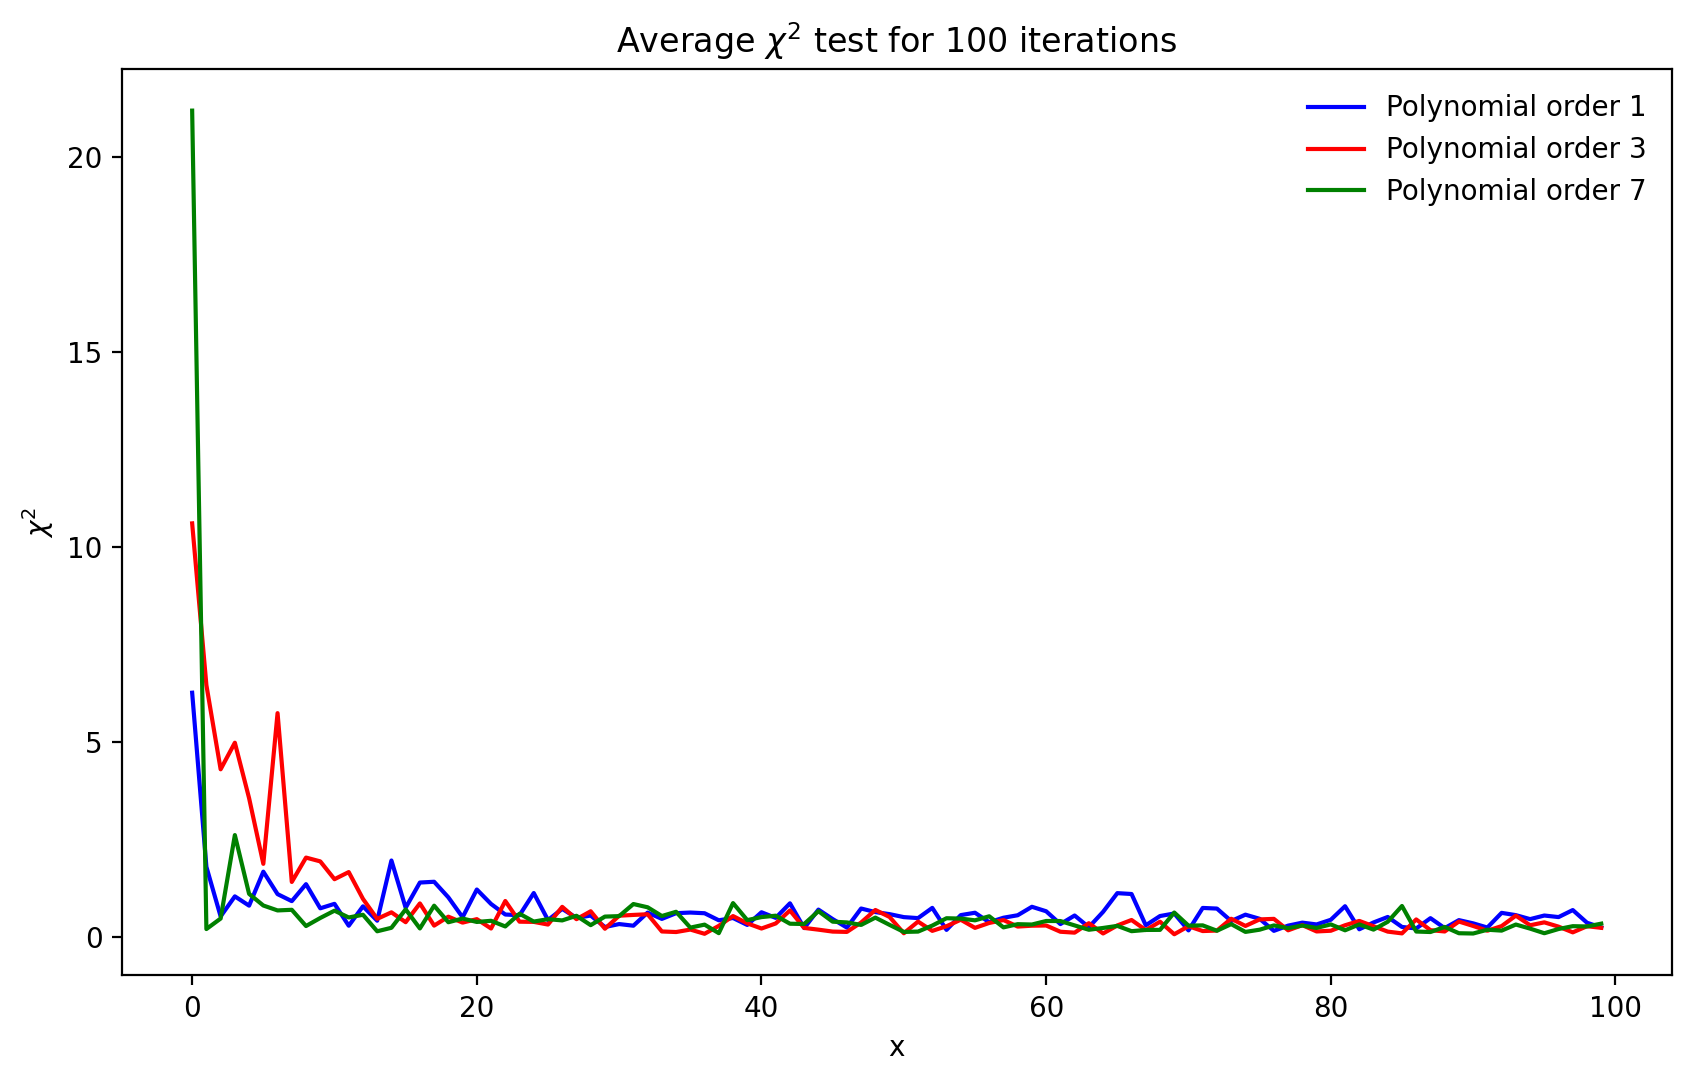

In [8]:
# create a new figure 
fig,ax=plt.subplots()
# specify array of expanded x values 
x_sweep=np.linspace(-0.5,1.5,100)
# define number of iterations 
nsteps = 100

# plot chi^2 values for each iteration...

# ... for order 1
ax.plot(np.arange(nsteps),fitThirdPoly(1, nsteps)[1], color="blue", label="Polynomial order 1")
# ... for order 3
ax.plot(np.arange(nsteps),fitThirdPoly(3, nsteps)[1], color="red", label="Polynomial order 3")
# ... for order 7
ax.plot(np.arange(nsteps),fitThirdPoly(7, nsteps)[1], color="green", label="Polynomial order 7")

# set titles and axis labels
ax.set_title(r"Average $\chi^2$ test for 100 iterations")
ax.set_xlabel("x") 
ax.set_ylabel(r"$\chi^2$")

# display legend
ax.legend();

Now we repeat the $\chi^2$ plot for 500 iterations to get a better idea of the difference between the different polynomials. 

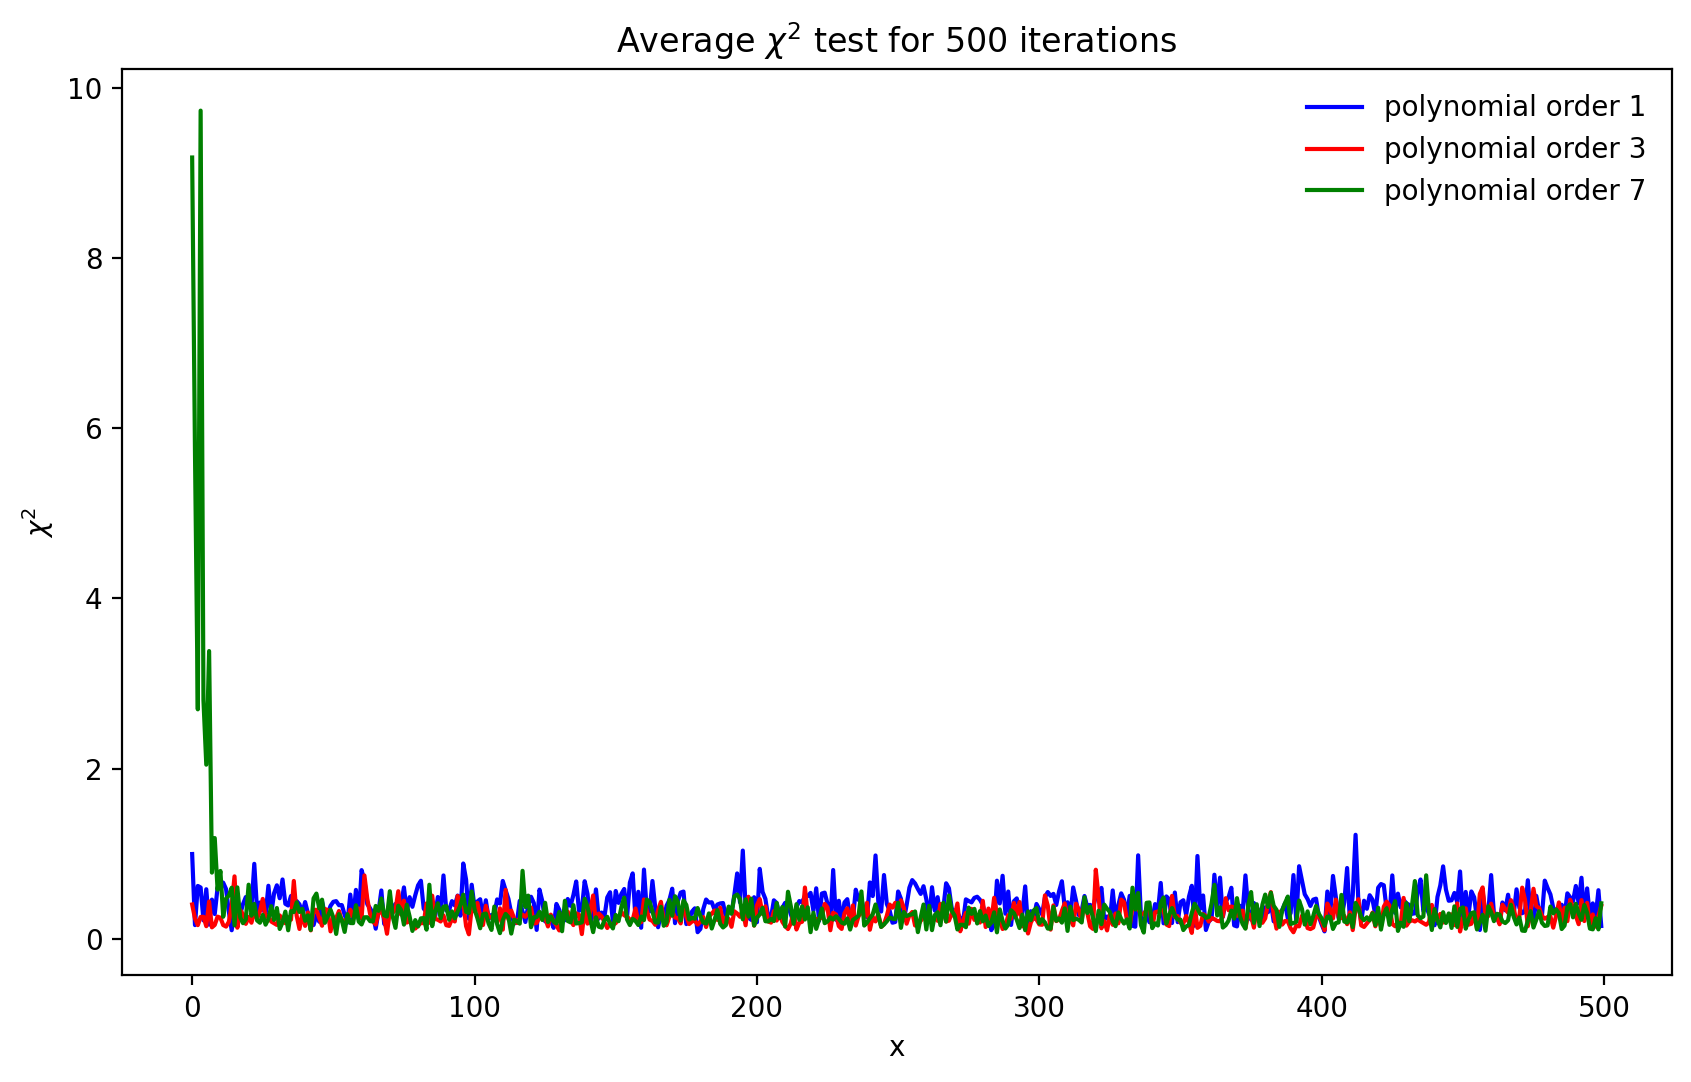

In [9]:
### Same as code cell above, but with nsteps = 500 ###

# create a new figure 
fig,ax=plt.subplots()
# specify array of expanded x values 
x_sweep=np.linspace(-0.5,1.5,100)
# define number of iterations 
nsteps = 500

# plot chi^2 values for each iteration...

# ... for order 1
ax.plot(np.arange(nsteps),fitThirdPoly(1, nsteps)[1], color="blue", label="polynomial order 1")
# ... for order 3
ax.plot(np.arange(nsteps),fitThirdPoly(3, nsteps)[1], color="red", label="polynomial order 3")
# ... for order 7
ax.plot(np.arange(nsteps),fitThirdPoly(7, nsteps)[1], color="green", label="polynomial order 7")

# set titles and axis labels
ax.set_title(r"Average $\chi^2$ test for 500 iterations")
ax.set_xlabel("x") 
ax.set_ylabel(r"$\chi^2$")

# display legend
ax.legend();

### Comparison within model training range 

From the plot of the three fitted polynomials and noisy data, we see that the polynomials of all three orders generally fit the data well within the range $0\leq x \leq1$. Visually we see that the $3^{rd}$ and $7^{th}$ order polynomials fit the training data the best, as they are "curves" as opposed to a straight line. Mathematically, the order 1 polynomial does not have enough degrees of freedom/parameters to be able to fit a $3^{rd}$ order polynomial sufficiently well, while the $3^{rd}$ and $7^{th}$ order polynomials are able to give a better fit to the given data. 


In general, the $\chi^2$ values decrease rapidly within the first 10 iterations and level off, for all order polynomials. From the $\chi^2$ plot of 100 iterations, we see that the third and seventh order polynomials are very similar. Furthermore, the plot of the $\chi^2$ for  500 iterations confirms that the best fit within the training range is the $7^{th}$ order polynomial. 

### Comparison outside of model training range 

Outside the model training range, there is a greater variation between the accuracy of fitting with different orders of polynomials. We see that the $1^{st}$ order polynomial is unable to fit the data value in the untrained range. Similarly, the $7^{th}$ order polynomial tends to curve much higher or much lower than the data values, as a result of having too many degrees of freedom/parameters. As a result of this, the fit varies greatly between each iteration in the untrained range, and whether it follows the same shape as the data values is highly unreliable. 

In comparison, the $3^{rd}$ order polynomial fits the data outside the training range very well compared to the $1^{st}$ and $7^{th}$ order. While this may be expected, it is significant to see that by allowing only the required number of degrees of freedom, the fitted $3^{rd}$ order polynomial fits the data values in the untrained range well in every iteration, and thus, the $3^{rd}$ order polynomial is the best fit overall as it reliably fits both the trained and untrained ranges of x. 

#### Conclusion 

- From this exercise, we see that we can implement the stochastic gradient descent algorithm efficiently by avoiding using loops and instead using functions and broadcasting arrays. 
- We also see that we can calculate the $\chi^2$ value to see how noisy data can be trained over several iterations, and how over a set number of iterations, the model is able to fit the data more and more accurately, seen by a reduction in the $\chi^2$ values. 
- Finally, we see that the best model to the noisy third order polynomial is, unsurprisingly, a polynomial of order 3. 
- This is because too few degrees of freedom gives a "too general" model both inside and outside the training range, while too many degrees of freedom gives a good fit in the training data, but an extremely poor fit in the untrained region. 
- Thus, we learn that a model should only be given enough variable parameters that allow it to fit the data to a finite, sufficient level of accuracy, allowing it to effectively generalise to the testing data, without overfitting or having too many parameters that it is unreliable. 

**External References:**

[1] “Code Faster with Line-of-Code Completions, Cloudless Processing,” www.kite.com. [Online]. Available: https://www.kite.com/python/answers/how-to-add-noise-to-a-signal-using-numpy-in-python. [Accessed: 10-Oct-2021]

[2] P. Mortensen, “python - What is a vectorized way to create multiple powers of a NumPy array?,” Stack Overflow, 2018. [Online]. Available: https://stackoverflow.com/questions/50428668/what-is-a-vectorized-way-to-create-multiple-powers-of-a-numpy-array. [Accessed: 10-Oct-2021]
